# Chronic Kidney Disease - Prediction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.classification.unique()
column=data.dtypes
print(column)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [4]:
data.classification = data.classification.replace("ckd\t", "ckd")
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [5]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [6]:
data.drop('id', axis=1, inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [7]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
numerical_columns = ['age', "bp","sg","al","su","bgr",'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

data[numerical_columns].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      70
wc      105
rc      130
dtype: int64

In [9]:
data['pcv'] = data['pcv'].replace('', '0')
data['rc'] = data['rc'].replace('', '0')
data['wc'] = data['wc'].replace('', '0')
data['pcv'] = data['pcv'].replace('\t?', '0')
data['rc'] = data['rc'].replace('\t?', '0')
data['wc'] = data['wc'].replace('\t?', '0')
data['pcv'] = data['pcv'].replace('\t43', '43')
data['wc'] = data['rc'].replace('\t6200', '6200')
data['wc'] = data['wc'].replace('\t8400', '8400')

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [11]:
data.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
categorical_columns = ['rbc', 'pc','pcc','ba', 'htn','dm','cad','appet','pe','ane']
data[categorical_columns].isnull().mean()*100

rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64

In [13]:
# for categorical data, we'll impute the most frequent values 
for i in categorical_columns:
    print(i, ": ", data[i].mode())

rbc :  0    normal
Name: rbc, dtype: object
pc :  0    normal
Name: pc, dtype: object
pcc :  0    notpresent
Name: pcc, dtype: object
ba :  0    notpresent
Name: ba, dtype: object
htn :  0    no
Name: htn, dtype: object
dm :  0    no
Name: dm, dtype: object
cad :  0    no
Name: cad, dtype: object
appet :  0    good
Name: appet, dtype: object
pe :  0    no
Name: pe, dtype: object
ane :  0    no
Name: ane, dtype: object


In [14]:
data['rbc'].fillna('normal', inplace=True)
data['pc'].fillna('normal', inplace=True)
data['pcc'].fillna('notpresent', inplace=True)
data['ba'].fillna('notpresent', inplace=True)
data['htn'].fillna('no', inplace=True)
data['dm'].fillna('no', inplace=True)
data['cad'].fillna('no', inplace=True)
data['appet'].fillna('good', inplace=True)
data['pe'].fillna('no', inplace=True)
data['ane'].fillna('no', inplace=True)

In [15]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,5.2,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,4.8,4.8,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,4.8,4.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,3.9,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,4.6,4.6,no,no,no,good,no,no,1


In [16]:
data['pcv']=data['pcv'].astype(int)
data['wc']=data['wc'].astype(int)
data['rc']=data['rc'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    flo

In [17]:
cat_mapping = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [18]:
data[categorical_columns] = data[categorical_columns].replace(cat_mapping)

In [19]:
data[categorical_columns] = data[categorical_columns].replace({' yes': 1, ' no': 0,'\tno': 0, '\tyes': 1}).astype(float)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44,5,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,38,4,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,4,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,3,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,4,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


<Axes: >

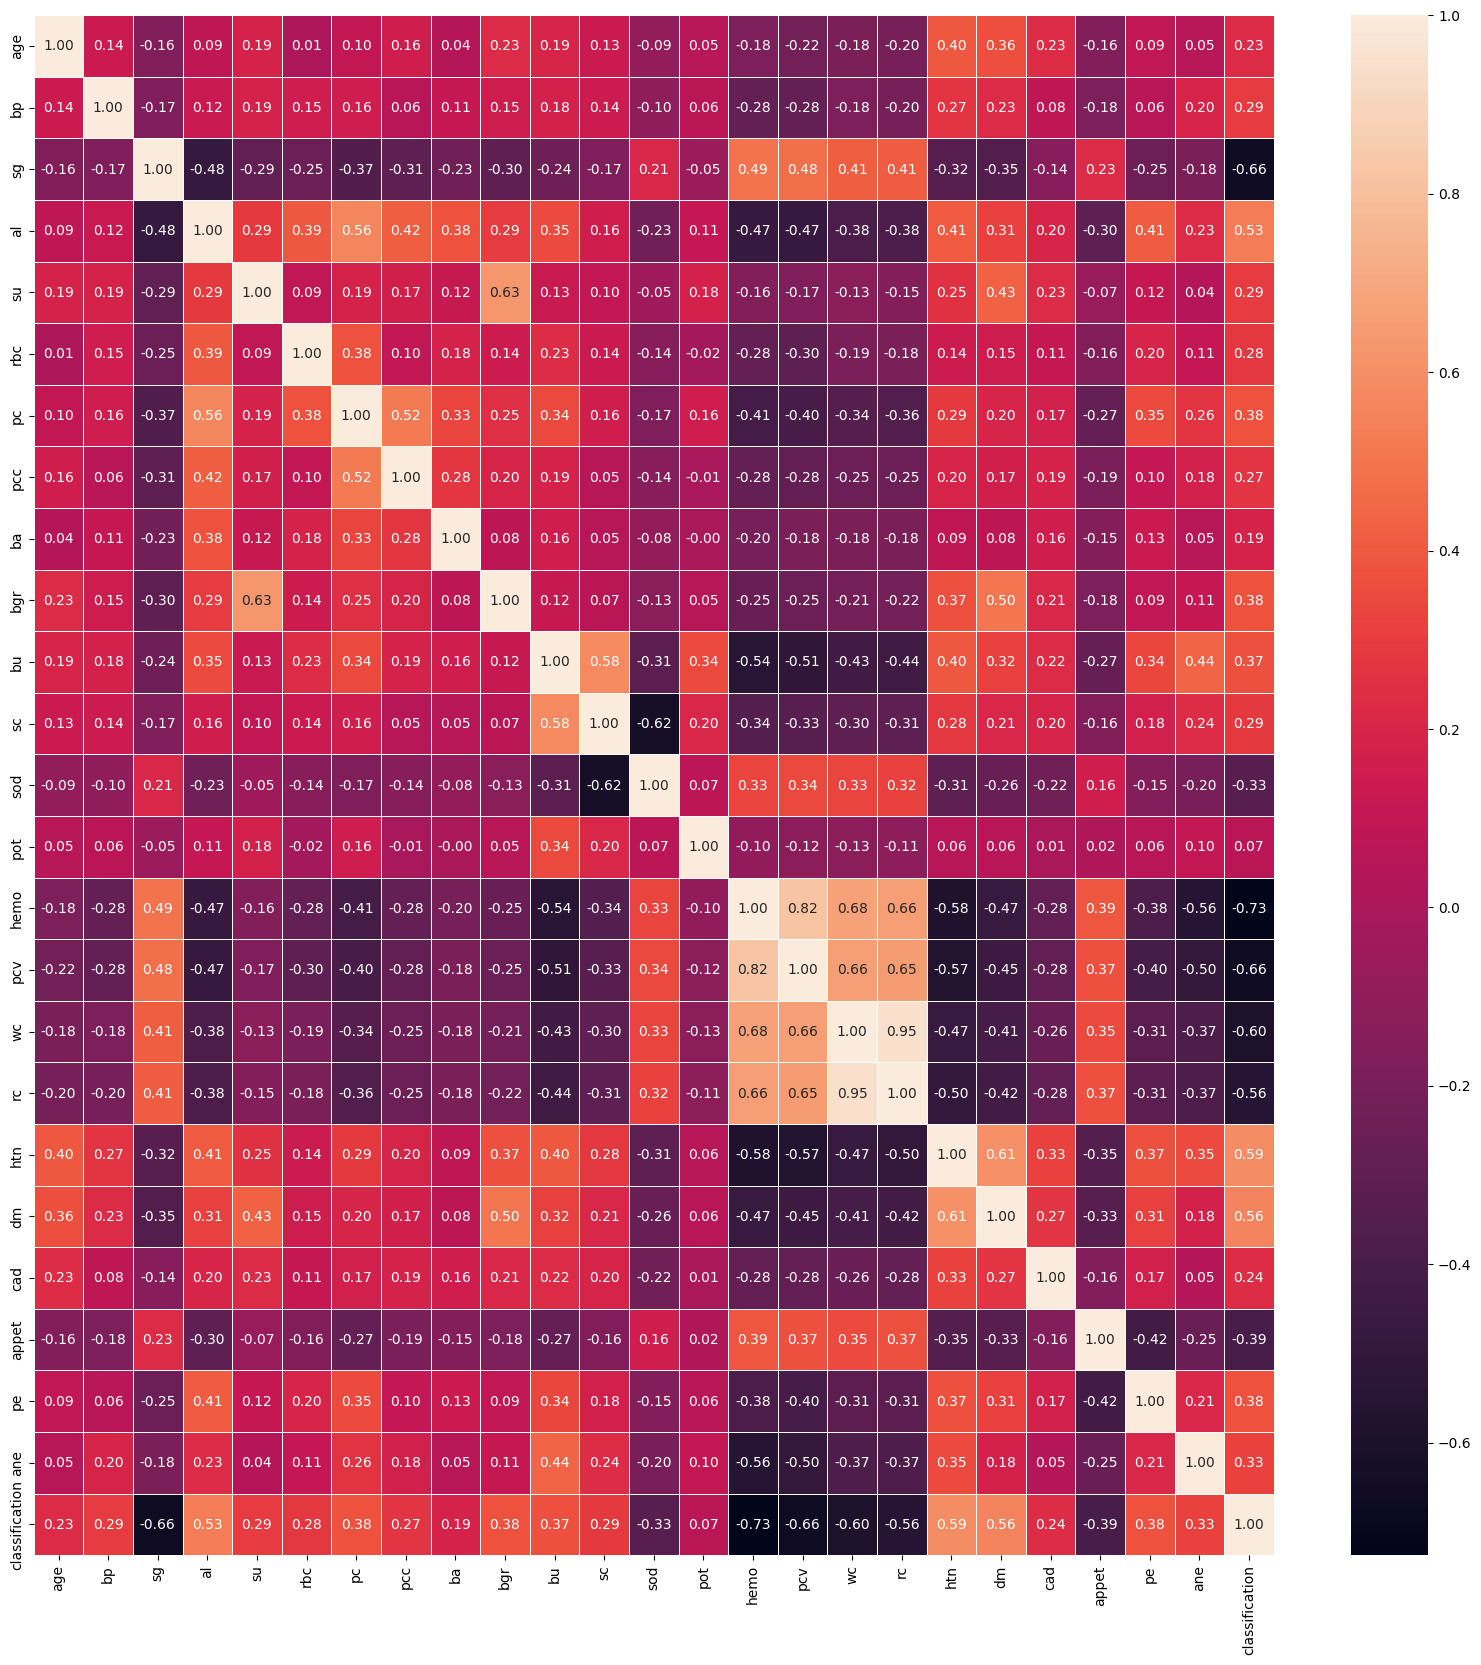

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [21]:
data.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,...,-0.217809,-0.184042,-0.201624,0.395073,0.364306,0.231419,-0.156581,0.094772,0.052938,0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,...,-0.275472,-0.177933,-0.204404,0.266901,0.226489,0.084135,-0.175054,0.056902,0.195134,0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,-0.299413,...,0.477771,0.413369,0.410259,-0.323643,-0.351016,-0.135814,0.230975,-0.253803,-0.184155,-0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,...,-0.470449,-0.379451,-0.380505,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,...,-0.171769,-0.131218,-0.150707,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
rbc,0.014904,0.150384,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,...,-0.304883,-0.187304,-0.184167,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
pc,0.102286,0.156231,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,...,-0.401164,-0.337003,-0.361003,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,...,-0.284348,-0.252113,-0.249233,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,...,-0.181339,-0.183256,-0.181706,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,...,-0.251893,-0.211822,-0.216862,0.367816,0.503254,0.207020,-0.177285,0.094806,0.112449,0.379321


In [22]:
x = data.drop(['classification', 'sg', 'sod', 'hemo', 'pcv', 'rc', 'appet'], axis=1)
y = data['classification']

In [23]:
x.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# RandomForest Implementation

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:

X_test['dm'].unique()

array([0., 1.])

In [28]:
X_train['dm'] = X_train['dm'].replace('\tyes', 1)
X_train['dm'] = X_train['dm'].replace('\tno', 0)
X_train['cad'] = X_train['cad'].replace('\tno', 0)

X_test['dm'] = X_test['dm'].replace(' yes', 1)

In [29]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
confusion_matrix(y_test, model.predict(X_test))

array([[28,  0],
       [ 1, 51]], dtype=int64)

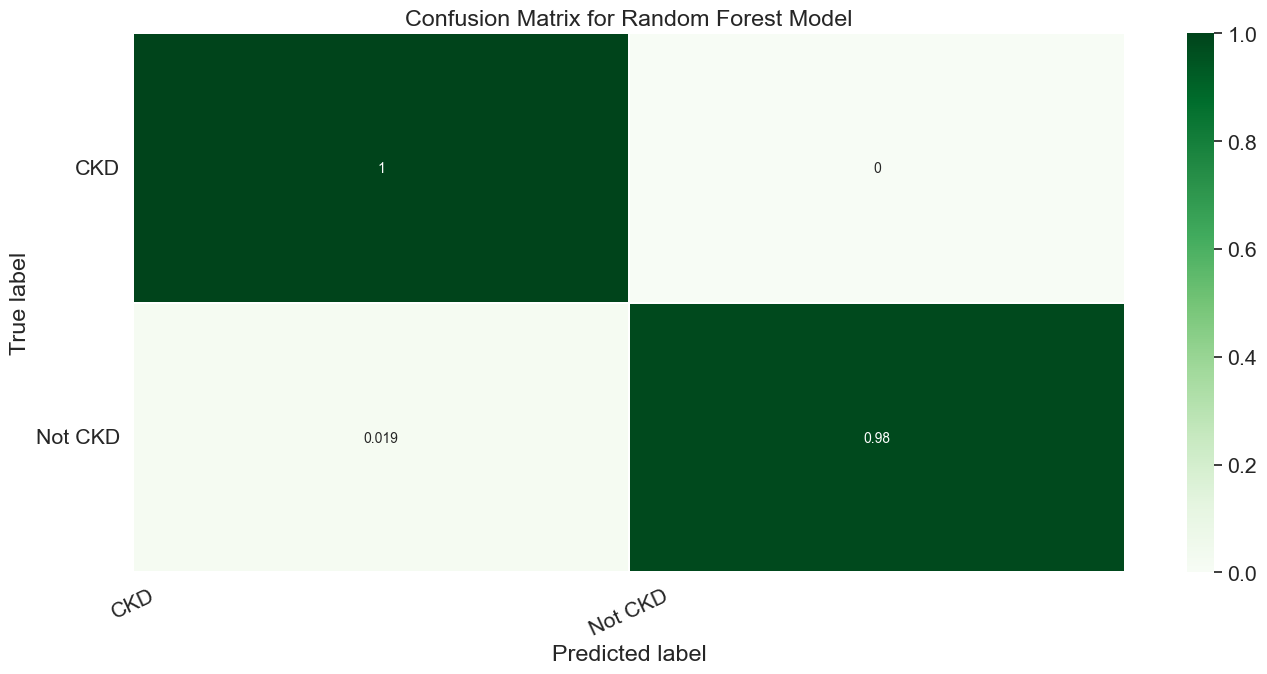

In [32]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)


class_names = ['CKD', 'Not CKD']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [33]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 98.75%


In [34]:
import pickle
pickle.dump(model, open('../models/kidney.pkl', 'wb'))

# Suppport Vector Machine

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [36]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [37]:
confusion_matrix(y_test, clf.predict(X_test))

array([[28,  0],
       [ 1, 51]], dtype=int64)

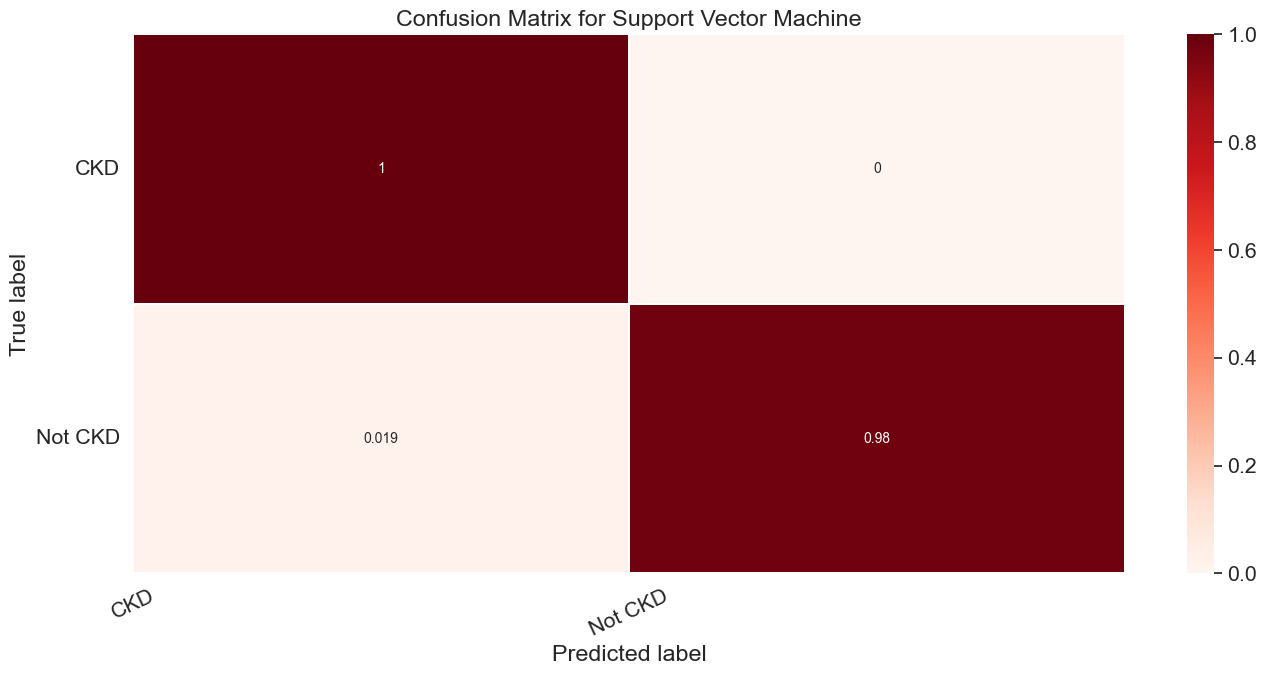

In [38]:

matrix = confusion_matrix(y_test, clf.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)


class_names = ['CKD', 'Not CKD']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [39]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 98.75%


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score




precision = precision_score(y_test, model.predict(X_test)) # true/true+false pos


recall = recall_score(y_test, model.predict(X_test))  #true/true+false neg


f1 = f1_score(y_test, model.predict(X_test))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 0.9807692307692307
F1 Score: 0.9902912621359222


C:\Users\naman\AppData\Local\Temp\ipykernel_23492\3827106628.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  remaining_non_numeric = data[numerical_columns].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

Remaining non-numeric values: age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


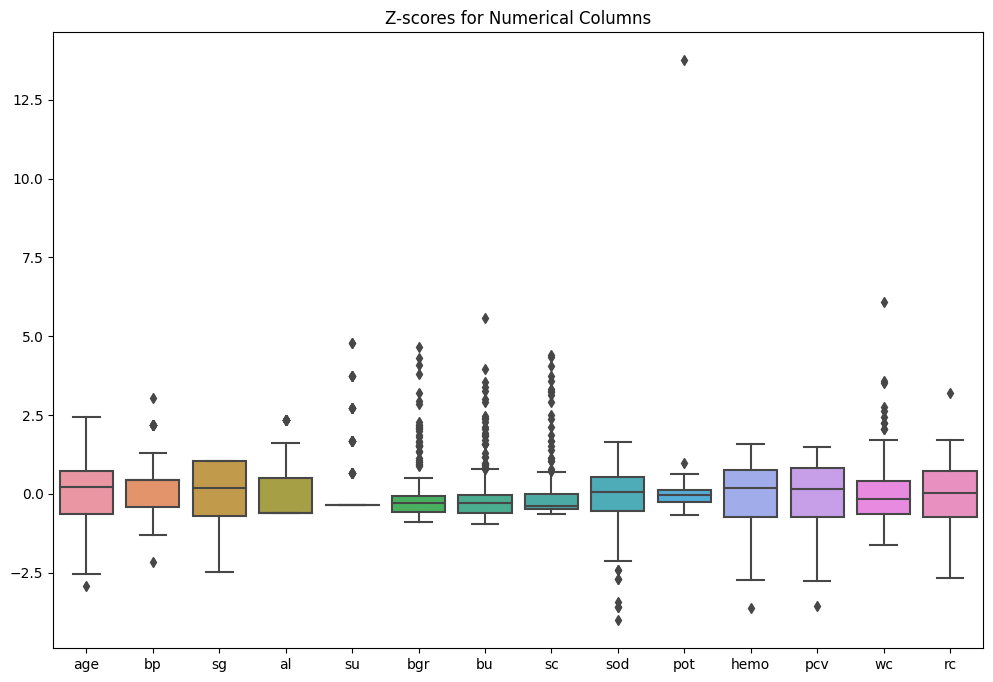

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


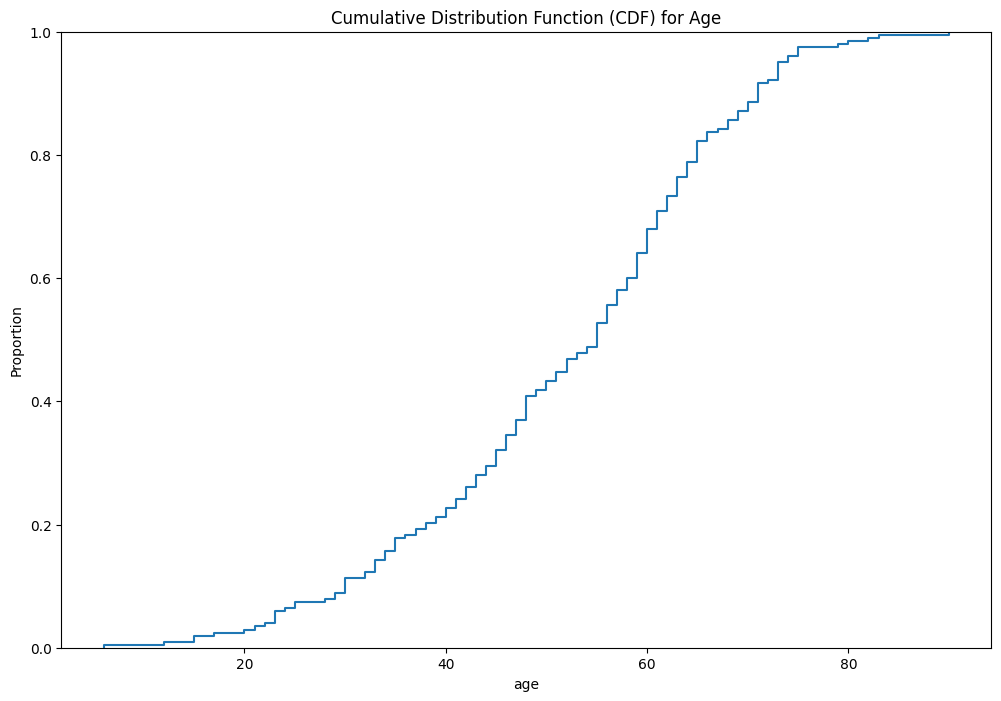

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


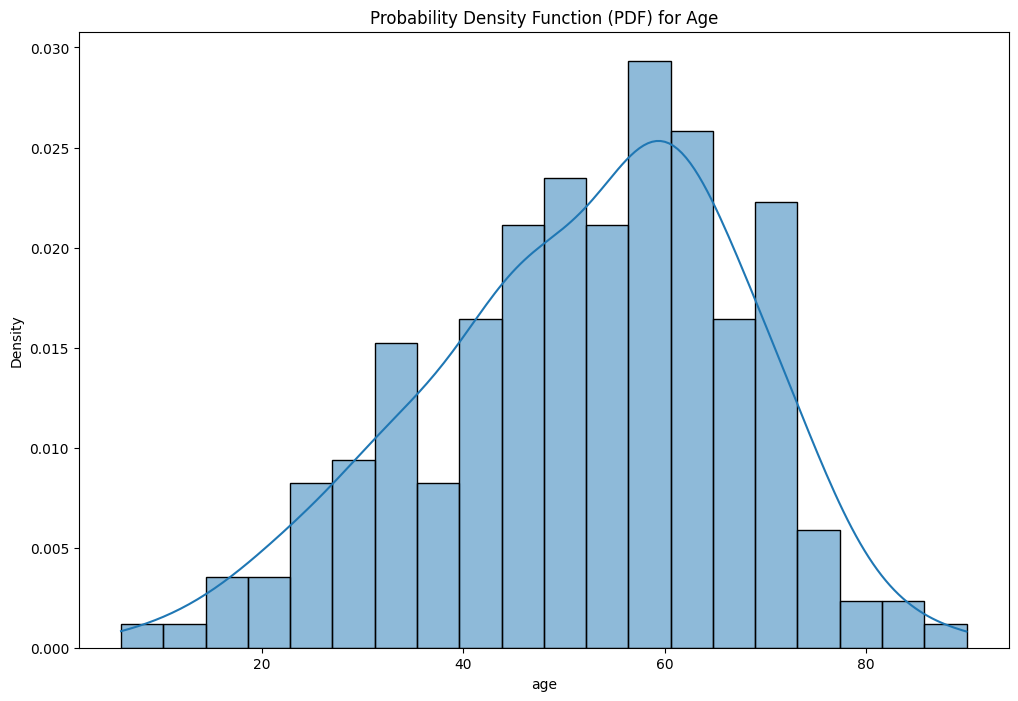

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


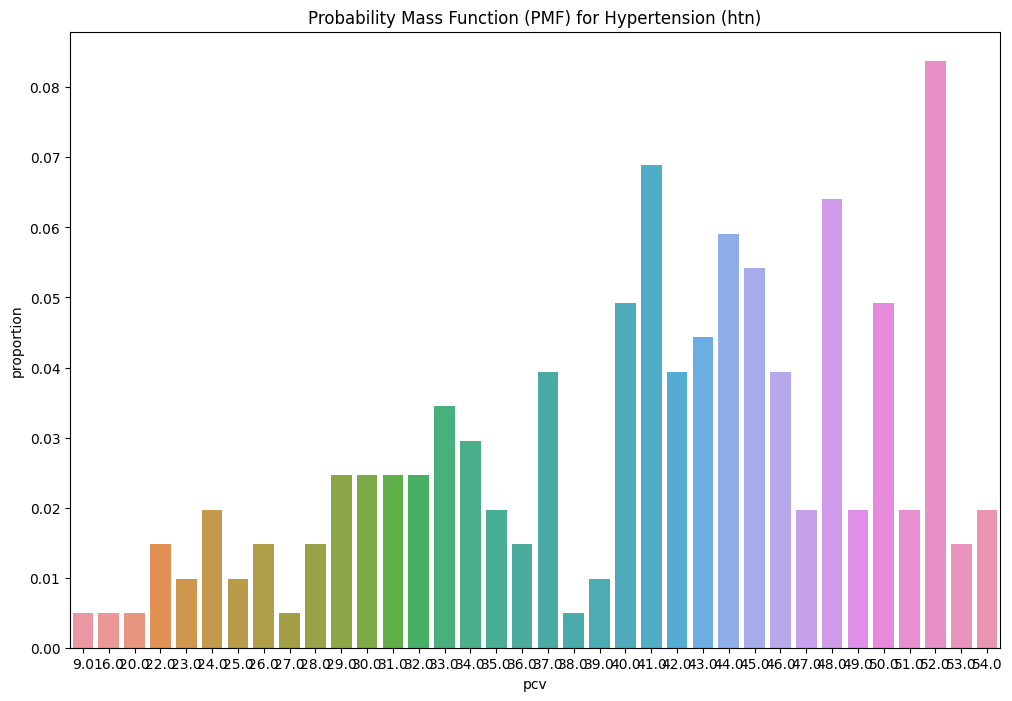

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


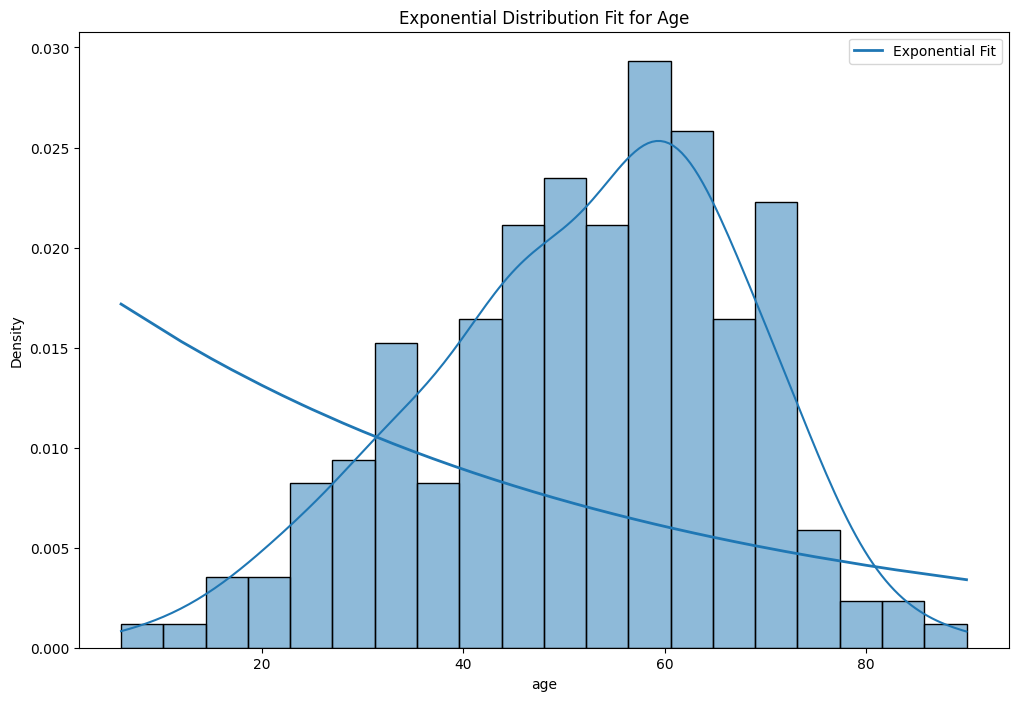

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


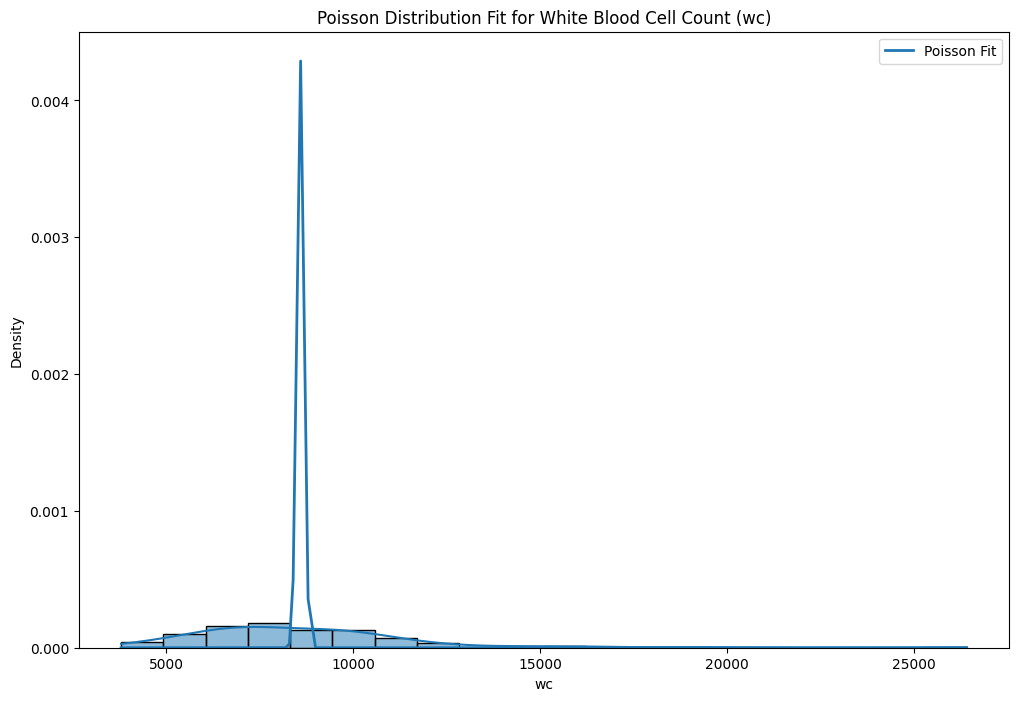

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, poisson

# Define numerical columns
numerical_columns = ['age', "bp","sg","al","su","bgr",'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Convert columns to numeric
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

# Check for any remaining non-numeric values
remaining_non_numeric = data[numerical_columns].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
print("Remaining non-numeric values:", remaining_non_numeric.sum())

# Drop any rows with non-numeric values
data = data.dropna(subset=numerical_columns)

# Calculate Z-scores for numerical columns
z_scores = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()






# Plot Z-scores using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=z_scores)
plt.title('Z-scores for Numerical Columns')
plt.show()

# Plot Cumulative Distribution Function (CDF) for a selected numerical column (e.g., age)
plt.figure(figsize=(12, 8))
sns.ecdfplot(data['age'])
plt.title('Cumulative Distribution Function (CDF) for Age')
plt.show()

# Plot Probability Density Function (PDF) for a selected numerical column (e.g., age)
plt.figure(figsize=(12, 8))
sns.histplot(data['age'], kde=True, stat='density', bins=20)
plt.title('Probability Density Function (PDF) for Age')
plt.show()

# Plot Probability Mass Function (PMF) for a selected categorical column (e.g., htn)
plt.figure(figsize=(12, 8))
sns.barplot(x=data['pcv'].value_counts().index, y=data['pcv'].value_counts(normalize=True))
plt.title('Probability Mass Function (PMF) for Hypertension (htn)')
plt.show()

# Fit an Exponential distribution to a numerical column (e.g., age) and plot it
plt.figure(figsize=(12, 8))
sns.histplot(data['age'], kde=True, stat='density', bins=20)
plt.plot(sorted(data['age']), expon.pdf(sorted(data['age']), scale=data['age'].mean()), label='Exponential Fit', linewidth=2)
plt.title('Exponential Distribution Fit for Age')
plt.legend()
plt.show()

# Fit a Poisson distribution to a numerical column (e.g., wc) and plot it
plt.figure(figsize=(12, 8))
sns.histplot(data['wc'], kde=True, stat='density', bins=20)
plt.plot(sorted(data['wc']), poisson.pmf(sorted(data['wc']), mu=data['wc'].mean()), label='Poisson Fit', linewidth=2)
plt.title('Poisson Distribution Fit for White Blood Cell Count (wc)')
plt.legend()
plt.show()


C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


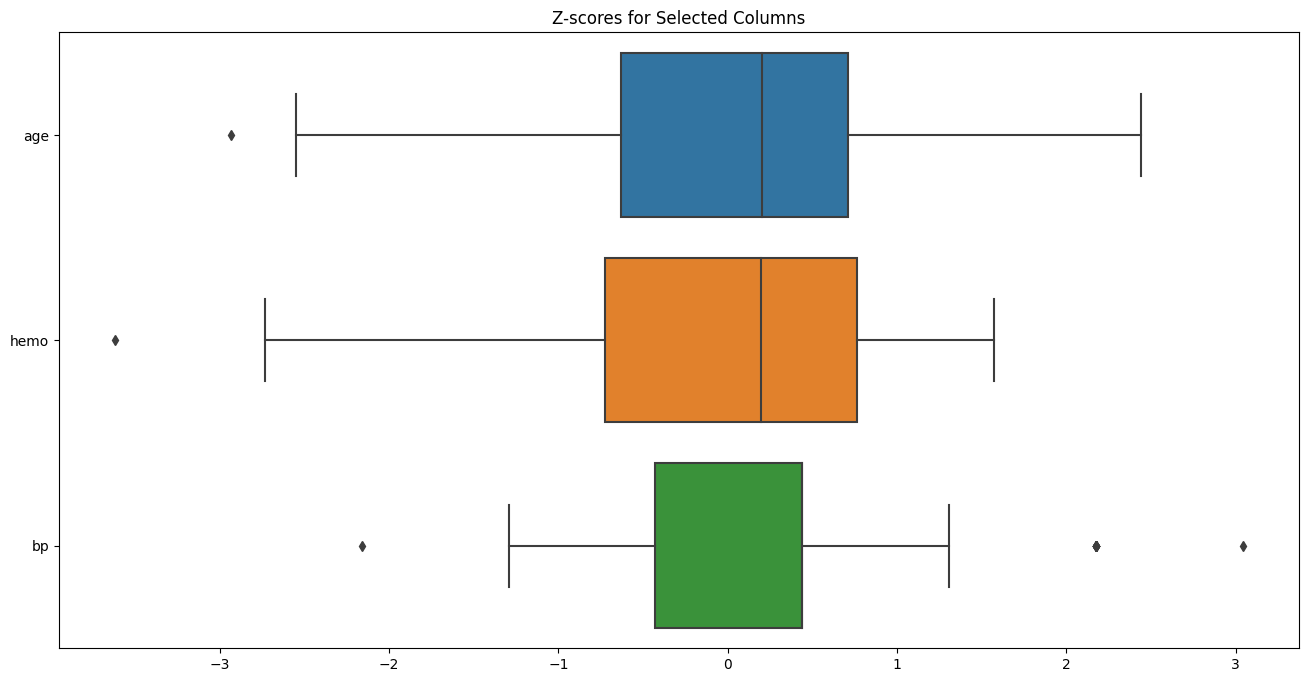

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

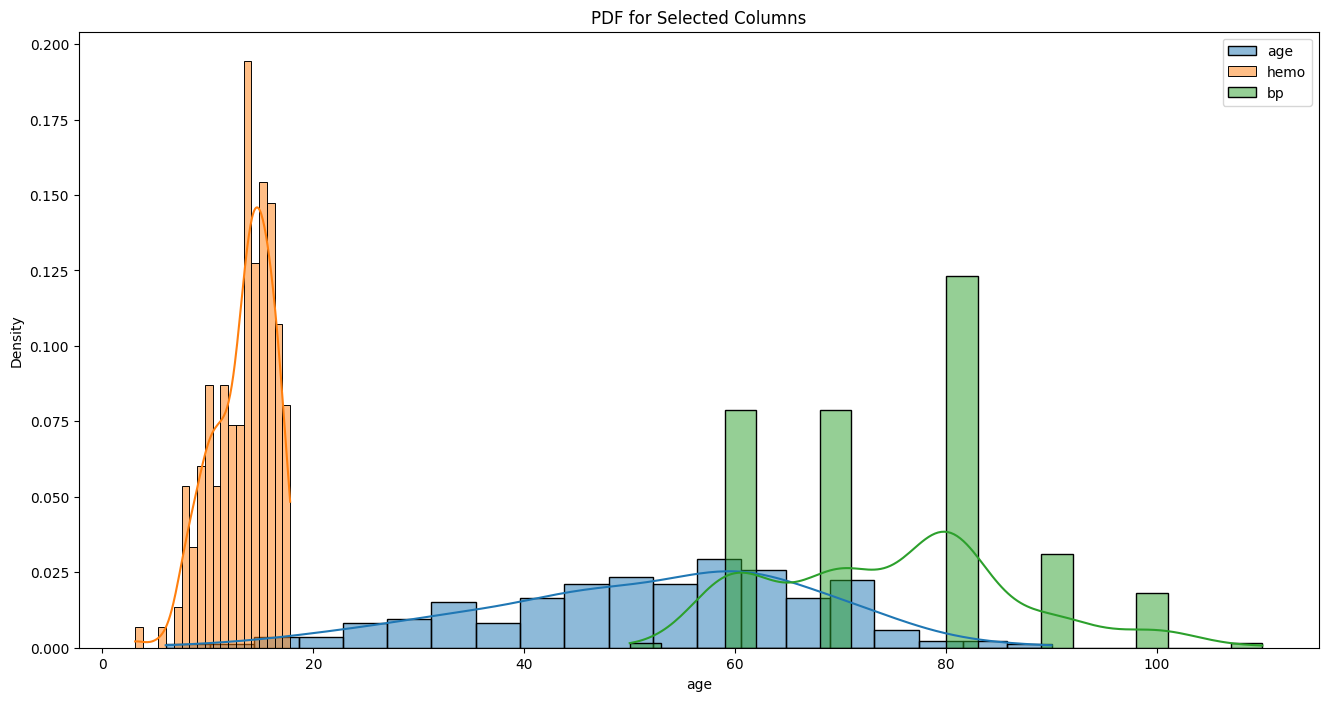

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

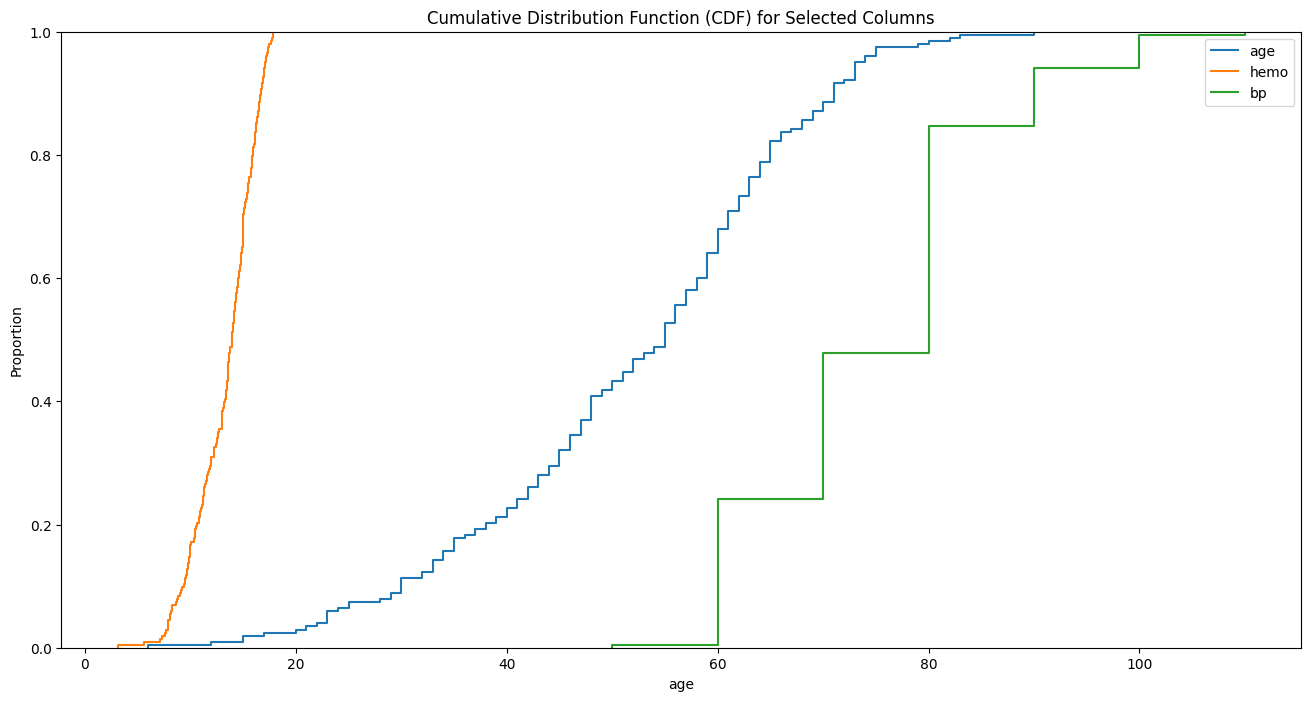

C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\naman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

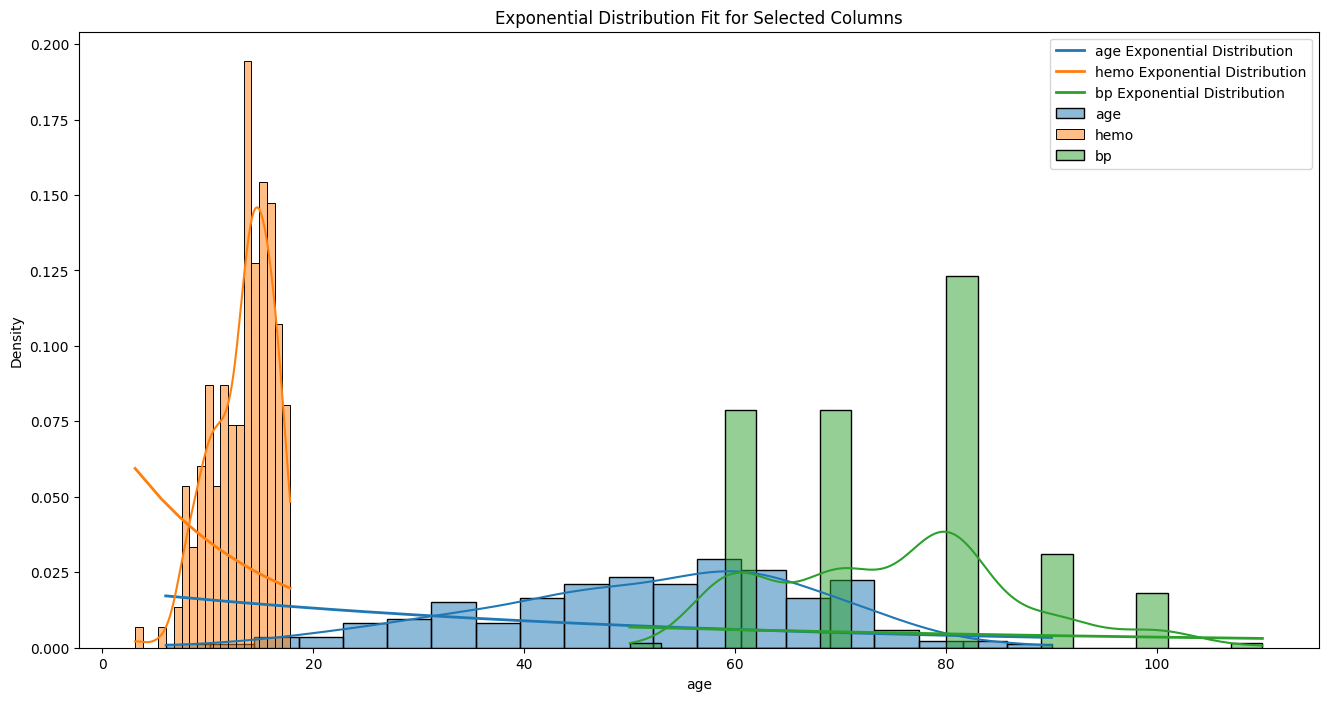

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Choose relevant numerical columns
columns_of_interest = ['age', 'hemo', 'bp']

# Calculate Z-scores for the selected columns
z_scores_columns = (data[columns_of_interest] - data[columns_of_interest].mean()) / data[columns_of_interest].std()

# Plot Z-scores using a boxplot for selected columns
plt.figure(figsize=(16, 8))
sns.boxplot(data=z_scores_columns, orient='h')
plt.title('Z-scores for Selected Columns')
plt.show()

# Plot Probability Density Function (PDF) for selected columns
plt.figure(figsize=(16, 8))
for column in columns_of_interest:
    sns.histplot(data[column], kde=True, stat='density', bins=20, label=column)
plt.title('PDF for Selected Columns')
plt.legend()
plt.show()

# Plot Cumulative Distribution Function (CDF) for selected columns
plt.figure(figsize=(16, 8))
for column in columns_of_interest:
    sns.ecdfplot(data[column], label=column)
plt.title('Cumulative Distribution Function (CDF) for Selected Columns')
plt.legend()
plt.show()

# Fit an Exponential distribution to the selected columns and plot it
plt.figure(figsize=(16, 8))
for column in columns_of_interest:
    sns.histplot(data[column], kde=True, stat='density', bins=20, label=column)
    plt.plot(sorted(data[column]), expon.pdf(sorted(data[column]), scale=data[column].mean()), label=f'{column} Exponential Distribution', linewidth=2)
plt.title('Exponential Distribution Fit for Selected Columns')
plt.legend()
plt.show()


In [15]:
# PMF for red blood cell count
pmf_rc = data['rc'].value_counts(normalize=True)

# CDF for blood urea
cdf_bu = data['bu'].sort_values().cumsum() / data['bu'].sum()

print(f"PMF for Red Blood Cell Count:\n{pmf_rc}")
print(f"CDF for Blood Urea:\n{cdf_bu}")


PMF for Red Blood Cell Count:
rc
4.5    0.073892
5.2    0.054187
3.9    0.049261
4.9    0.049261
4.8    0.044335
4.7    0.044335
5.9    0.039409
5.3    0.034483
5.0    0.034483
3.4    0.029557
5.8    0.029557
5.6    0.029557
5.5    0.029557
6.2    0.024631
5.1    0.024631
5.4    0.024631
6.1    0.024631
6.4    0.024631
4.0    0.024631
3.2    0.024631
4.3    0.024631
3.7    0.024631
4.6    0.024631
5.7    0.019704
3.8    0.019704
6.0    0.014778
6.3    0.014778
6.5    0.014778
4.4    0.014778
4.2    0.014778
4.1    0.014778
2.9    0.009852
3.6    0.009852
2.1    0.009852
3.5    0.009852
3.1    0.009852
3.3    0.004926
2.5    0.004926
3.0    0.004926
8.0    0.004926
2.8    0.004926
2.6    0.004926
2.7    0.004926
Name: proportion, dtype: float64
CDF for Blood Urea:
256    0.000925
250    0.001850
272    0.003237
62     0.004625
366    0.006012
         ...   
43     0.910554
130    0.929794
246    0.949681
153    0.971418
249    1.000000
Name: bu, Length: 203, dtype: float64


In [16]:
# Z scores for age
z_scores_age = (data['age'] - data['age'].mean()) / data['age'].std()
print(f"Z Scores for Age:\n{z_scores_age}")


Z Scores for Age:
3     -0.246596
5      0.520592
9      0.073066
11     0.712389
12     1.032051
         ...   
395    0.200930
396   -0.630190
397   -2.548160
398   -2.228498
399    0.392727
Name: age, Length: 203, dtype: float64
